In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

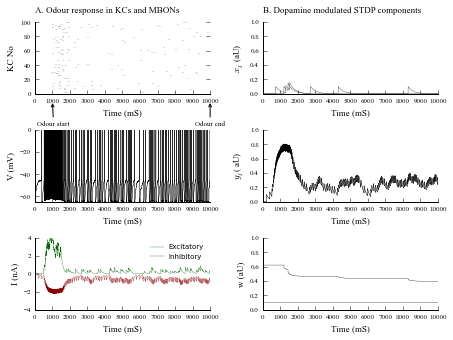

In [8]:
# fig methods
%reset -f
%matplotlib inline
%reload_ext autoreload
%autoreload 2
from fly_mb_figures import *
import numpy as np
from sklearn.preprocessing import normalize


start = 1000
kcs = np.zeros((m_duration,n_kc))
kc_spikes_t = np.zeros((n_kc,))
indices = np.sort(np.random.choice(n_kc, n_kc_active, replace=False))
sp_times = np.sort(np.random.randint(low=start, high=m_duration, size=(n_kc_active,2)))

sp_times2 = np.sort(np.random.randint(low=start, high=start+100 / dt, size=(n_kc_active,2)))

for i in range(0, n_kc_active):
    kcs[sp_times[i],indices[i]] = 1
    kcs[sp_times2[i],indices[i]] = 1
spikes = []
for i in range(0,n_kc):
    spikes.append(list ( np.where(kcs[:,i])))
s_time = np.linspace(0,duration, duration / dt)
ind = np.random.binomial(1 , p=0.1 , size = (200, 1))
ind = ind > 0



def get_axis_limits(ax,  x_scale=1, y_scale=1):
    return ax.get_xlim()[1]*x_scale + 100, ax.get_ylim()[1]*y_scale

def plot_figure_test():
    csfont = {'fontname':'Comic Sans MS'}
    syns = [8,1]
    lw = 0.3
    color ='black'
    marker = 'o'
    ylabel  = 'V (mV)'


    fontsize = 7
    fontsize_l = 9
    xticks = [0,1000, 2000, 3000, 4000,5000, 6000, 7000, 8000,9000, 10000]
    xlabels=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1 ]
    xticks = [ 0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000 ]
    yticks =[-60,-40,-20,0]
    size = (8,8)
    fig = plt.figure()
    fig.set_size_inches(size)
    
    
    fig = plt.figure()
    plt.subplot(321)
    ax = plt.gca()
    #ax.annotate('A', xy=(0, 1), xytext=(-70, 0), va='top', xycoords='axes fraction', textcoords='offset points',fontsize=30)
    fig.set_size_inches(size)
    ax.annotate('A. Odour response in KCs and MBONs', xy=(0, 1), xytext=(0, 15), va='top', xycoords='axes fraction',
                textcoords='offset points',fontsize=fontsize_l,fontname="Times New Roman")
    for ith, trial in enumerate(spikes):
        plt.vlines(trial[0], ith + .5, ith + 1.5, color=color, linewidth = lw)
    plt.ylim(.5, len(spikes) + .5)
    plt.tick_params(labelsize=fontsize)
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    
    plt.xlim([0,10000])
    plt.ylabel('KC No', fontsize=fontsize_l,fontname="Times New Roman")
    plt.xlabel('Time (mS)',fontsize=fontsize_l,fontname="Times New Roman")
    plt.gcf().subplots_adjust(bottom=.4,left=.2)
    #ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    plt.xticks(xticks, xlabels , fontname="Times New Roman")
    plt.yticks([0,20,40,60,80,100],fontname="Times New Roman")
    ax.annotate('Odour start',arrowprops=dict(facecolor='black',arrowstyle="->"), xy=(0.1, -0.1), xytext=(-15, -20), va='top', xycoords='axes fraction', textcoords='offset points',fontsize=fontsize,fontname="Times New Roman")
    ax.annotate('Odour end',arrowprops=dict(facecolor='black', arrowstyle="->"), xy=(1, -0.1), xytext=(-15, -20), va='top', xycoords='axes fraction', textcoords='offset points',fontsize=fontsize,fontname="Times New Roman")

    fig.set_size_inches(size)
    
    
    #fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
    ax1 = plt.subplot(323)  
    ax = plt.gca()

    plt.plot(mtr_m4_v,linewidth = lw, color =color ,marker='')
    plt.ylabel('V (mV)',fontsize=fontsize_l,fontname="Times New Roman")
    plt.xlabel('Time (mS)',fontsize=fontsize_l,fontname="Times New Roman")
    plt.tick_params(labelsize=fontsize)
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    #plt.gcf().subplots_adjust(bottom=.4,left=.2)
    plt.xticks(xticks, xlabels, fontname="Times New Roman")
    plt.yticks(yticks,fontname="Times New Roman")
    
    
    plt.plot(mtr_m4_v,linewidth = lw, color =color ,marker='')
    
    plt.subplot(325)
    ax = plt.gca()
    plt.plot(mtr_gex,linewidth = lw, marker='', color ='darkgreen',label='Excitatory' )
    plt.plot(-1 * mtr_ginh,linewidth = lw,marker='', color ='darkred',label='Inhibitory' )
    plt.legend( loc='upper right', numpoints = 1,frameon=False, fontsize=fontsize )

    #plt.plot(mtr_m4_v,linewidth = lw, color =color ,marker='')
    plt.ylabel('I (nA)',fontsize=fontsize_l,fontname="Times New Roman")
    plt.xlabel('Time (mS)',fontsize=fontsize_l,fontname="Times New Roman")
    plt.tick_params(labelsize=fontsize)
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    #plt.gcf().subplots_adjust(bottom=.4,left=.2)
    plt.ylim([-4,4])
    plt.tick_params(labelsize=fontsize)
    #plt.gcf().subplots_adjust(bottom=.4,left=.2)
    plt.xticks(xticks, xlabels, fontname="Times New Roman")
    plt.yticks([-4,-2,0,2,4],fontname="Times New Roman")
    
    #fig = plt.figure()
    plt.subplot(322)
    ax = plt.gca()
    #ax.annotate('B', xy=(0, 1), xytext=(-70, 0), va='top', xycoords='axes fraction', textcoords='offset points',fontsize=30)
    ax.annotate('B. Dopamine modulated STDP components', xy=(0, 1), xytext=(0, 15), va='top', xycoords='axes fraction',
                textcoords='offset points',fontsize=fontsize_l,fontname="Times New Roman")
    plt.plot(mtr_xmr[:, syns],linewidth = lw, color =color ,marker='')
    #plt.gcf().subplots_adjust(bottom=.4,left=.2)
    plt.ylabel(r'$x_j$' + ' (aU)',fontsize=fontsize_l,fontname="Times New Roman")
    plt.xlabel('Time (mS)',fontsize=fontsize_l,fontname="Times New Roman")
    plt.tick_params(labelsize=fontsize)
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    plt.xticks(xticks, xlabels, fontname="Times New Roman")
    #plt.gcf().subplots_adjust(bottom=.4,left=.2)
    plt.ylim([0,1])
    plt.xticks(xticks, xlabels, fontname="Times New Roman")
    plt.yticks([0,0.2,0.4,0.6,0.8,1],fontname="Times New Roman")
    
    #norm1 = x / np.linalg.norm(x)
    #norm_xmr = mtr_xmr[:,syns] / np.linalg.norm(mtr_xmr[:,syns])
    plt.subplot(324)
    ax = plt.gca()
    plt.plot(mtr_ymr[:,syns],linewidth = lw, color =color ,marker='')
    #plt.gcf().subplots_adjust(bottom=.4,left=.2)
    plt.ylabel(''+r'$y_j$'+'( aU)',fontsize=fontsize_l,fontname="Times New Roman")
    plt.xlabel('Time (mS)',fontsize=fontsize_l,fontname="Times New Roman")
    plt.tick_params(labelsize=fontsize)
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    plt.ylim([0,1])
    plt.xticks(xticks, xlabels, fontname="Times New Roman")
    plt.yticks([0,0.2,0.4,0.6,0.8,1],fontname="Times New Roman")
    
    #fig = plt.figure()
    plt.subplot(326)
    ax = plt.gca()
    plt.plot(mtr_w_m4[:, syns],linewidth = lw, color =color ,marker='')
    #plt.gcf().subplots_adjust(bottom=.4,left=.2)
    plt.ylabel('w (aU)',fontsize=fontsize_l,fontname="Times New Roman")
    plt.xlabel('Time (mS)',fontsize=fontsize_l,fontname="Times New Roman")
    plt.xticks(xticks, xlabels, fontname="Times New Roman")
    plt.tick_params(labelsize=fontsize)
    plt.ylim([0,1])
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    plt.xticks(xticks, xlabels, fontname="Times New Roman")
    plt.yticks([0,0.2,0.4,0.6,0.8,1],fontname="Times New Roman")
    
    plt.subplots_adjust(wspace=0.3, hspace = 0.5)
    plt.savefig('fig2_methods2.eps',bbox_inches='tight', transparent="True", pad_inches=0.1)
    #plt.subplots_adjust(left=0.25, bottom=0.3, right=1, top=1, wspace=None, hspace=None)
    
    #plt.plot(mtr_m4_v,linewidth = lw, color =color ,marker=marker)
    #plt.gcf().subplots_adjust(bottom=.4,left=.2)
    #plt.subplots_adjust(left=0.25, bottom=0.2, right=1, top=1, wspace=None, hspace=None)
    

#params = sim_mvp_m4_simple(d_ginh=0.1, folder='fig2_results',weights_color='purple')
plot_figure_test()

this was mvp spikes before learnign
M4 spiked 2514
MVP spiked 2795


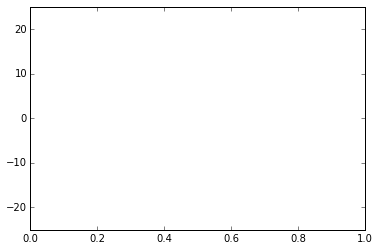

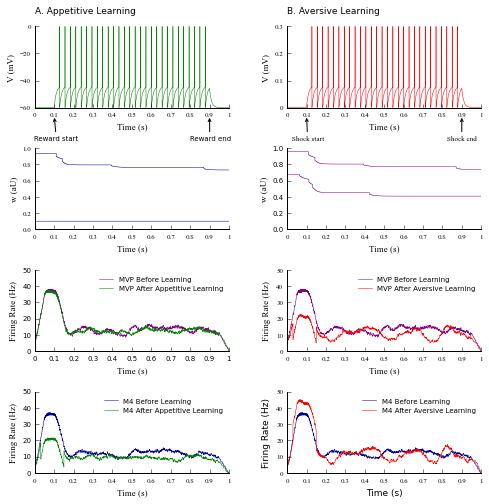

In [22]:
%reset -f
%matplotlib inline
%reload_ext autoreload
%autoreload 2
from fly_mb_figures import *


rbm4, rm4app, ram4ave, rbmvp, ramvpapp, ramvpave = fig3_tuned()


this was mvp spikes before learnign
file saved
M4 spiked 2514
MVP spiked 2795


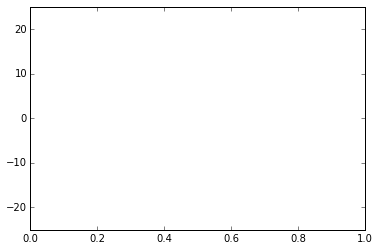

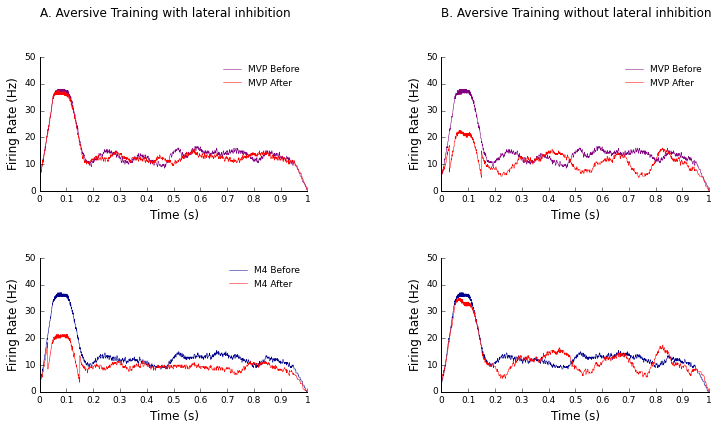

In [19]:
%reset -f
%matplotlib inline
%reload_ext autoreload
%autoreload 2
from fly_mb_figures import *
rbm4, rm4app, ram4ave, rbmvp, ramvpapp, ramvpave = fig4_aversive_twice()

this was mvp spikes before learnign
file saved
M4 spiked 641
MVP spiked 786


(array([ 2.,  2.,  2., ...,  0.,  0.,  0.]),
 array([ 2.,  2.,  2., ...,  0.,  0.,  0.]),
 array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
 array([ 4.,  4.,  4., ...,  0.,  0.,  0.]),
 array([ 4.,  4.,  4., ...,  0.,  0.,  0.]),
 array([ 0.,  0.,  0., ...,  0.,  0.,  0.]))

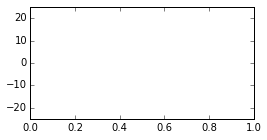

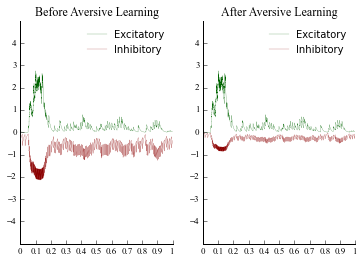

In [28]:
# fig methods
%reset -f
%matplotlib inline
%reload_ext autoreload
%autoreload 2
from fly_mb_figures import *
import numpy as np
fig5_currents_before_after_aversive()